In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_processed.csv')

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train["Census_ChassisTypeName"] = le.fit_transform(train.Census_ChassisTypeName)

In [10]:
le = LabelEncoder()
train["Census_PowerPlatformRoleName"] = le.fit_transform(train.Census_PowerPlatformRoleName)
le = LabelEncoder()
train["Census_PrimaryDiskTypeName"] = le.fit_transform(train.Census_PrimaryDiskTypeName)

In [16]:
variance = train.var()

In [30]:
subset_var = variance[variance>1.027555e+00].index

In [33]:
train.HasDetections.var()

0.24999998502432877

In [36]:
display_all(variance.sort_values())

IsBeta                                               7.509907e-06
AutoSampleOptIn                                      2.891813e-05
Census_IsPortableOperatingSystem                     5.449037e-04
Census_DeviceFamily                                  1.614843e-03
HasTpm                                               1.188425e-02
Census_IsVirtualDevice                               1.406706e-02
IsSxsPassiveMode                                     1.703332e-02
Firewall                                             3.131739e-02
Census_IsPenCapable                                  3.662152e-02
IsProtected                                          5.568506e-02
AVProductsEnabled                                    6.486237e-02
Census_IsFlightsDisabled                             7.068563e-02
Census_HasOpticalDiskDrive                           7.122941e-02
Processor                                            8.311743e-02
Census_IsAlwaysOnAlwaysConnectedCapable              8.362488e-02
ProductNam

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:71], train.iloc[:,71], test_size=0.2, train_size=0.8, random_state=42)

In [42]:
X_valid = X_test.iloc[:800000,:]
y_valid = y_test.iloc[:800000]

In [43]:
X_test = X_test.iloc[800000:,:]
y_test = y_test.iloc[800000:]

In [44]:
print (X_valid.shape)
print (y_valid.shape)
print (X_test.shape)
print (y_valid.shape)

(800000, 71)
(800000,)
(984297, 71)
(800000,)


In [45]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1, max_depth=10, verbose=1)
m.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [48]:
m.score(X_valid, y_valid)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished


0.6116275

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

e = ExtraTreesClassifier(n_jobs=-1, max_depth=10, verbose=1)
e.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=10, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [50]:
e.score(X_valid, y_valid)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.7s finished


0.592405

In [51]:
best_features = m.feature_importances_

In [52]:
best_features

array([1.62762973e-04, 7.16658906e-02, 2.99871272e-02, 1.47237736e-01,
       0.00000000e+00, 1.47019062e-02, 6.88970446e-03, 2.10535631e-01,
       9.63854162e-02, 2.00503353e-02, 2.10531521e-03, 2.54612025e-03,
       5.76950937e-04, 2.21478591e-03, 7.55381036e-03, 1.21784407e-03,
       8.88672633e-03, 4.48028970e-04, 4.13517701e-03, 4.63649042e-04,
       1.40269768e-03, 7.29576091e-03, 7.74934492e-04, 5.77564140e-03,
       4.06730694e-06, 6.63195663e-03, 4.86339157e-04, 1.21896217e-04,
       7.33508597e-03, 1.38731425e-05, 2.68884644e-03, 2.07810096e-03,
       8.91312040e-03, 1.37680980e-04, 5.84257025e-03, 3.94899054e-02,
       1.46097947e-03, 1.10146187e-02, 2.17609283e-04, 3.83649828e-02,
       5.18331256e-03, 2.79061762e-02, 1.26354098e-02, 3.05889256e-03,
       1.21864968e-02, 1.42601599e-03, 1.52046407e-02, 1.80824593e-02,
       2.56365668e-03, 3.77309994e-03, 7.77593878e-03, 6.91469089e-03,
       3.87812993e-03, 1.39438531e-02, 3.80896315e-03, 4.91553557e-03,
      

In [53]:
from sklearn.ensemble import RandomForestClassifier
%time m1 = RandomForestClassifier(n_jobs=-1, max_depth=10, verbose=1, max_features=0.5)
m1.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 97 µs


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  9.7min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [54]:
m1.score(X_train, y_train)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    4.1s finished


0.6168188695096358

In [55]:
m1.score(X_valid, y_valid)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished


0.61562625

In [56]:
f_imp = pd.Series(index=X_train.columns,data=m1.feature_importances_)


In [60]:
display_all(f_imp.sort_values(ascending=False))

AVProductsInstalled                                  0.191986
AVProductStatesIdentifier                            0.184544
AvSigVersion                                         0.142930
Census_PrimaryDiskTotalCapacity                      0.057659
EngineVersion                                        0.056827
Census_InternalPrimaryDiagonalDisplaySizeInInches    0.050188
AppVersion                                           0.048676
Census_TotalPhysicalRAM                              0.045199
Census_OSInstallTypeName                             0.039083
Census_IsVirtualDevice                               0.013401
Census_ActivationChannel                             0.012174
Wdft_IsGamer                                         0.011999
Census_OSVersion                                     0.010698
IeVerIdentifier                                      0.008876
Wdft_RegionIdentifier                                0.007384
Census_OSUILocaleIdentifier                          0.007268
RtpState

In [61]:
import seaborn as sns

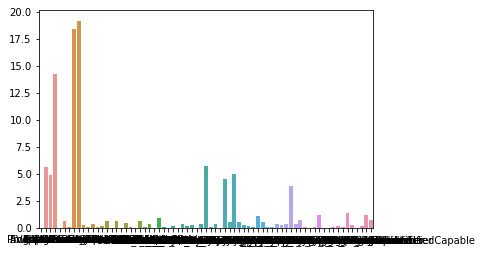

In [64]:
sns.barplot(x=f_imp.index, y=f_imp.values*100)

In [65]:
f_imp = f_imp.sort_values(ascending=False)

In [66]:
display_all(f_imp)

AVProductsInstalled                                  0.191986
AVProductStatesIdentifier                            0.184544
AvSigVersion                                         0.142930
Census_PrimaryDiskTotalCapacity                      0.057659
EngineVersion                                        0.056827
Census_InternalPrimaryDiagonalDisplaySizeInInches    0.050188
AppVersion                                           0.048676
Census_TotalPhysicalRAM                              0.045199
Census_OSInstallTypeName                             0.039083
Census_IsVirtualDevice                               0.013401
Census_ActivationChannel                             0.012174
Wdft_IsGamer                                         0.011999
Census_OSVersion                                     0.010698
IeVerIdentifier                                      0.008876
Wdft_RegionIdentifier                                0.007384
Census_OSUILocaleIdentifier                          0.007268
RtpState

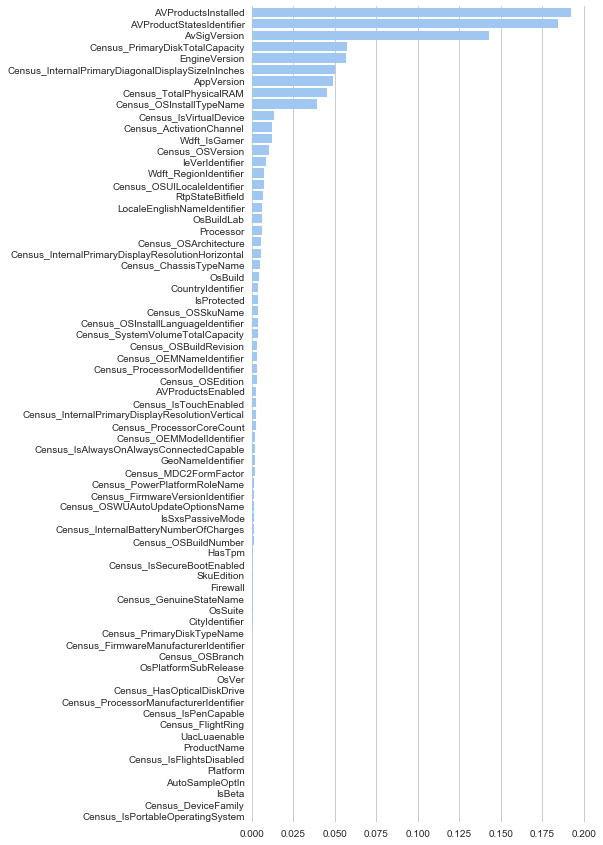

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=f_imp.values, y=f_imp.index, label="Importance", color="b")

sns.despine(left=True, bottom=True)

In [69]:
subset = f_imp[f_imp > 0.001675].index

In [70]:
len(subset)

42

In [74]:
from sklearn.ensemble import RandomForestClassifier
%time
m2 = RandomForestClassifier(n_jobs=-1, max_depth=10, verbose=1, max_features=0.5)
m2.fit(X_train[subset], y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 30.5 µs


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.3min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [75]:
m2.score(X_valid[subset], y_valid)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished


0.61611375

In [76]:
import joblib

In [77]:
joblib.dump(m2, 'rf1.dat')

['rf1.dat']

In [79]:
import gc
gc.collect()

279

In [80]:
test = pd.read_csv('test_processed.gz')

In [84]:
preds = m2.predict(test[subset])

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.8s finished


In [85]:
mc = pd.read_csv('test.csv.zip', usecols=['MachineIdentifier'])
mc["HasDetections"] = preds
mc.to_csv('submission2.csv', compression='gzip',index=False)

In [86]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_jobs=-1, max_depth=7, n_estimators=50, silent=False, colsample_bytree=0.5)
clf.fit(X_train, y_train)

MemoryError: 

In [87]:
gc.collect()

75

In [89]:
del m2, mc, preds

#### XgBoost Section

In [3]:
top_attr = ["AVProductsInstalled",
"AVProductStatesIdentifier",
"AvSigVersion",
"Census_PrimaryDiskTotalCapacity",
"EngineVersion",
"Census_InternalPrimaryDiagonalDisplaySizeInInches",
"AppVersion",
"Census_TotalPhysicalRAM",
"Census_OSInstallTypeName",
"Census_IsVirtualDevice",
"Census_ActivationChannel",
"Wdft_IsGamer",
"Census_OSVersion",
"IeVerIdentifier",
"Wdft_RegionIdentifier",
"Census_OSUILocaleIdentifier",
"RtpStateBitfield",
"LocaleEnglishNameIdentifier",
"OsBuildLab",
"Processor",
"Census_OSArchitecture",
"Census_InternalPrimaryDisplayResolutionHorizontal",
"Census_ChassisTypeName",
"OsBuild",
"CountryIdentifier",
"IsProtected",
"Census_OSSkuName",
"Census_OSInstallLanguageIdentifier",
"Census_SystemVolumeTotalCapacity",
"Census_OSBuildRevision",
"Census_OEMNameIdentifier",
"Census_ProcessorModelIdentifier",
"Census_OSEdition",
"AVProductsEnabled",
"Census_IsTouchEnabled",
"Census_InternalPrimaryDisplayResolutionVertical",
"Census_ProcessorCoreCount",
"Census_OEMModelIdentifier",
"Census_IsAlwaysOnAlwaysConnectedCapable",
"GeoNameIdentifier",
"Census_MDC2FormFactor",
"Census_PowerPlatformRoleName",
"Census_FirmwareVersionIdentifier",
"Census_OSWUAutoUpdateOptionsName",
"IsSxsPassiveMode",
"Census_InternalBatteryNumberOfCharges",
"Census_OSBuildNumber",
"HasTpm",
"Census_IsSecureBootEnabled",
"SkuEdition",
"Firewall",
"Census_GenuineStateName",
"OsSuite",
"CityIdentifier",
"Census_PrimaryDiskTypeName",
"Census_FirmwareManufacturerIdentifier",
"Census_OSBranch",
"OsPlatformSubRelease",
"OsVer",
"Census_HasOpticalDiskDrive",
"Census_ProcessorManufacturerIdentifier",
"Census_IsPenCapable",
"Census_FlightRing",
"UacLuaenable",
"ProductName",
"Census_IsFlightsDisabled",
"Platform"]

In [3]:
train = pd.read_csv('train_processed.csv', usecols=top_attr)

In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [5]:
display_all(train.dtypes)

ProductName                                            int64
EngineVersion                                          int64
AppVersion                                             int64
AvSigVersion                                           int64
RtpStateBitfield                                     float64
IsSxsPassiveMode                                       int64
AVProductStatesIdentifier                            float64
AVProductsInstalled                                  float64
AVProductsEnabled                                    float64
HasTpm                                                 int64
CountryIdentifier                                      int64
CityIdentifier                                       float64
GeoNameIdentifier                                    float64
LocaleEnglishNameIdentifier                            int64
Platform                                               int64
Processor                                              int64
OsVer                   

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train["Census_ChassisTypeName"] = le.fit_transform(train.Census_ChassisTypeName)
le = LabelEncoder()
train["Census_PowerPlatformRoleName"] = le.fit_transform(train.Census_PowerPlatformRoleName)
le = LabelEncoder()
train["Census_PrimaryDiskTypeName"] = le.fit_transform(train.Census_PrimaryDiskTypeName)

In [7]:
train.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,4,65,59,7800,7.0,0,53447.0,1.0,1.0,1,...,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,4,55,26,6303,7.0,0,53447.0,1.0,1.0,1,...,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,4,65,59,7671,7.0,0,53447.0,1.0,1.0,1,...,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,4,65,59,7722,7.0,0,53447.0,1.0,1.0,1,...,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,4,65,59,7681,7.0,0,53447.0,1.0,1.0,1,...,355.0,19844.0,0,0.0,0,0,0.0,0.0,1.0,1


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:67], train.iloc[:,67], test_size=0.2, train_size=0.8, random_state=42)

In [9]:
import xgboost as xgb

In [12]:
%time clf = xgb.XGBClassifier(n_jobs=-1, max_depth=10, n_estimators=50, silent=False, colsample_bytree=0.5)
clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 49.4 µs
[15:47:11] Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[15:47:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1948 extra nodes, 0 pruned nodes, max_depth=10
[15:48:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1980 extra nodes, 0 pruned nodes, max_depth=10
[15:48:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1916 extra nodes, 0 pruned nodes, max_depth=10
[15:49:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1952 extra nodes, 0 pruned nodes, max_depth=10
[15:49:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1900 extra nodes, 0 pruned nodes, max_depth=10
[15:49:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1814 extra nodes, 0 pruned nodes, max_depth=10
[15:50

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [14]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

0.6372829187069193


/home/pratikv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
import gc 
gc.collect()

229

In [ ]:
%time clf2 = xgb.XGBClassifier(n_jobs=-1, max_depth=10, n_estimators=100, silent=False, colsample_bytree=0.5)
clf2.fit(X_train, y_train)

In [11]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test)))

0.643925871085363


/home/pratikv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [1]:
import gc
gc.collect()

0

In [1]:
import joblib

In [16]:
joblib.dump(clf2, 'xgb_model1.dat')

['xgb_model1.dat']

In [2]:
clf = joblib.load('xgb_model1.dat')

In [7]:
test = pd.read_csv('test_processed.gz', usecols=top_attr)

In [8]:
test.shape

(7853253, 67)

In [9]:
clf.feature_importances_.shape

(67,)

In [11]:
preds = clf.predict(test)

/home/pratikv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [12]:
preds

array([1, 1, 0, ..., 0, 1, 0])

In [13]:
mc = pd.read_csv('test.csv.zip', usecols=['MachineIdentifier'])

In [14]:
mc['HasDetections'] = preds

In [23]:
mc.to_csv('submission3.gz', compression='gzip', index=False)

In [16]:
type(preds)

numpy.ndarray

In [17]:
np.sum(preds)

2836652

In [18]:
import gc
gc.collect()

7

In [19]:
proba = clf.predict_proba(test)

In [22]:
mc['HasDetections'] = proba[:,1]

In [ ]:
import joblib
joblib.dump()